In [48]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime , date

import warnings
warnings.filterwarnings('ignore')

In [49]:
# Loading the Transaction Data from the excel file
trans = pd.read_excel('Raw_data.xlsx', sheet_name= 'Transactions')

In [50]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [51]:
trans.shape

(20000, 13)

In [52]:
trans.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date    datetime64[ns]
dtype: object

In [53]:
trans.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000.000000,19803.000000,19803
mean,10000.500000,45.36465,1738.246050,2017-07-01 14:08:05.280000,0.500458,1107.829449,556.046951,2004-07-31 18:38:13.834267392
min,1.000000,0.00000,1.000000,2017-01-01 00:00:00,0.000000,12.010000,7.210000,1991-01-21 00:00:00
25%,5000.750000,18.00000,857.750000,2017-04-01 00:00:00,0.000000,575.270000,215.140000,1997-08-25 00:00:00
50%,10000.500000,44.00000,1736.000000,2017-07-03 00:00:00,1.000000,1163.890000,507.580000,2004-08-17 00:00:00
75%,15000.250000,72.00000,2613.000000,2017-10-02 00:00:00,1.000000,1635.300000,795.100000,2011-05-09 00:00:00
max,20000.000000,100.00000,5034.000000,2017-12-30 00:00:00,1.000000,2091.470000,1759.850000,2016-12-06 00:00:00
std,5773.647028,30.75359,1011.951046,NaN,0.500013,582.825242,405.955660,NaN


In [54]:
trans.describe(include= 'object')

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [55]:
trans.count()

transaction_id             20000
product_id                 20000
customer_id                20000
transaction_date           20000
online_order               19640
order_status               20000
brand                      19803
product_line               19803
product_class              19803
product_size               19803
list_price                 20000
standard_cost              19803
product_first_sold_date    19803
dtype: int64

In [56]:
# Total Records
print('Total number of records(rows):{}'. format(trans.shape[0]))
print('Total number of records(columns):{}'. format(trans.shape[1]))

Total number of records(rows):20000
Total number of records(columns):13


## 1. Missing Values Check

In [57]:
# Total missing values in each column
trans.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [58]:
# Missing values in percentage
trans.isnull().sum()/len(trans) * 100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

<Axes: >

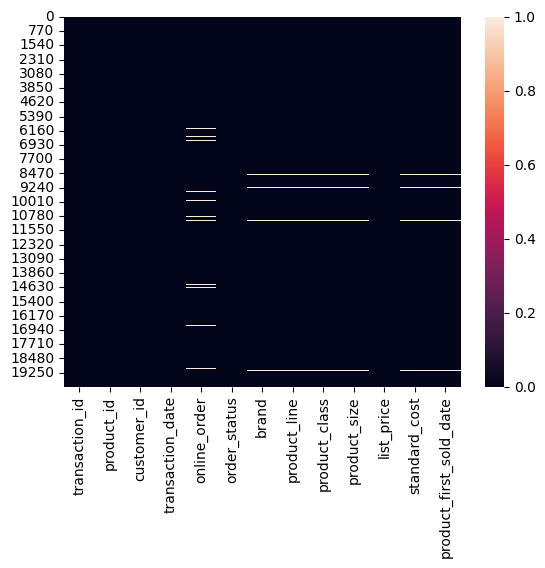

In [59]:
# Checking missing values with heatmap
sns.heatmap(trans.isnull())

### 1.1 Online Order

Since 1.8% of the records have online_order data missing we can perform mode imputation for this categorical column.

In [60]:
trans[trans['online_order'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
97,98,49,333,2017-06-23,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2003-07-21
166,167,90,3177,2017-04-26,NaN,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-10
169,170,6,404,2017-10-16,NaN,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2003-08-05
250,251,63,1967,2017-04-11,NaN,Approved,Solex,Standard,medium,medium,1483.20,99.59,2015-05-21
300,301,78,2530,2017-03-24,NaN,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1997-01-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19514,19515,51,690,2017-01-22,NaN,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19573,19574,18,1735,2017-01-15,NaN,Approved,Solex,Standard,medium,medium,575.27,431.45,2013-03-12
19580,19581,49,1933,2017-10-12,NaN,Approved,Trek Bicycles,Road,medium,medium,533.51,400.13,2012-06-04
19635,19636,98,1389,2017-07-26,NaN,Approved,Trek Bicycles,Standard,high,medium,358.39,215.03,2004-01-16


In [61]:
online_order_mode = trans['online_order'].mode() [0]
online_order_mode

1.0

In [62]:
trans['online_order'].fillna(online_order_mode, inplace = True )

In [63]:
trans['online_order'].isnull().sum()

0

### 1.2 Brand, product_line, product_class, product_size

In [64]:
# Set option to view all results
# pd.set_option("display.max_rows", None, "display.max_columns", None)

In [65]:
# Set option to view default results
# pd.set_option('display.max_rows', 10 , "display.max_columns", None)

In [66]:
# Fetching records where Brand is missing.
trans[trans['brand'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaT
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaT
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaT
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaT
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19340,19341,0,443,2017-12-26,1.0,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaT
19383,19384,0,2407,2017-06-11,0.0,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaT
19793,19794,0,2860,2017-01-13,0.0,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaT
19859,19860,0,2468,2017-06-24,1.0,Approved,NaN,NaN,NaN,NaN,1497.43,NaN,NaT


In [67]:
trans[trans['brand'].isnull()][['brand', 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date']].shape[0]

197

It is observed that when brand is null then all other column values with missing values viz. 'product_line', 'product_class', 'product_size', 'standard_cost', 'product_first_sold_date' are also null. Also this null values comprise 1 % of the dataset. Hence we can drop these records/rows.

In [68]:
drop_brand_index = trans[trans['brand'].isnull()].index
drop_brand_index

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [69]:
trans.drop(index=drop_brand_index, axis = 0, inplace = True)

In [70]:
trans.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

## 2. Inconsistency Check

We will check whether there is inconsistent data / typo error data is present in the categorical columns. The columns to be checked are 'online_order', 'order_status' ,'product_line', 'product_class' , 'product_class' and 'brand'

In [71]:
trans['online_order'].value_counts()

online_order
1.0    10097
0.0     9706
Name: count, dtype: int64

In [72]:
trans['order_status'].value_counts()

order_status
Approved     19625
Cancelled      178
Name: count, dtype: int64

In [73]:
trans[['order_status', 'online_order']]

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
2,Approved,0.0
3,Approved,0.0
4,Approved,1.0
...,...,...
19995,Approved,1.0
19996,Approved,1.0
19997,Approved,1.0
19998,Approved,0.0


In [74]:
trans[['order_status', 'online_order']].drop_duplicates()

,order_status,online_order
0,Approved,0.0
1,Approved,1.0
42,Cancelled,0.0
254,Cancelled,1.0


In [75]:
trans['product_line'].value_counts()

product_line
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: count, dtype: int64

In [76]:
trans['product_class'].value_counts()

product_class
medium    13826
high       3013
low        2964
Name: count, dtype: int64

In [77]:
trans['brand'].value_counts()

brand
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: count, dtype: int64

In [78]:
trans['product_first_sold_date'] 

0       2012-12-02
1       2014-03-03
2       1999-07-20
3       1998-12-16
4       2015-08-10
           ...    
19995   2003-07-21
19996   1997-05-10
19997   2010-08-20
19998   2004-08-17
19999   1999-06-23
Name: product_first_sold_date, Length: 19803, dtype: datetime64[ns]

In [79]:
# Converting the product first sold date into standard datetime format.
trans['product_first_sold_date'] = pd.to_datetime(trans['product_first_sold_date'])

## 3. Duplication Check

In [80]:
# Dropping the primary key column i.e transaction_id and storing into a temporary dataframe.
trans_dedupped = trans.drop('transaction_id', axis = 1).drop_duplicates()

print("Number of records after removing transaction_id (pk), duplicates : {}".format(trans_dedupped.shape[0]))
print("Number of records in original dataset : {}".format(trans.shape[0]))

Number of records after removing transaction_id (pk), duplicates : 19803
Number of records in original dataset : 19803


Since both the numbers are same. There are no duplicate records in the dataset.

## 4. Outlier Check

<Axes: >

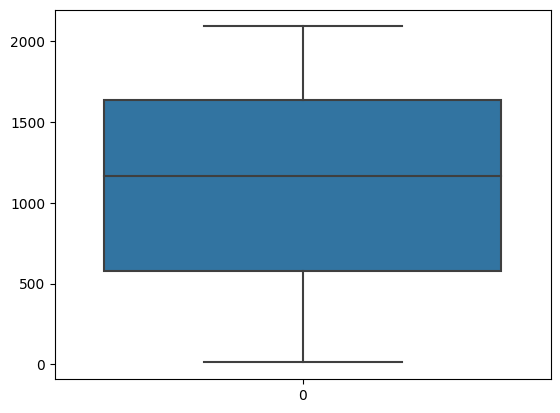

In [81]:
sns.boxplot(trans['list_price'])

<Axes: >

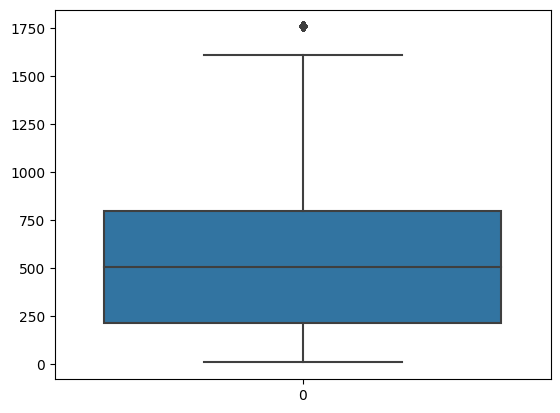

In [82]:
sns.boxplot(trans['standard_cost'])

By checking via graphs there are no significant outliers.

## 5. Creating a new feature "Profit"

In [83]:
trans['Profit'] = trans['list_price'] - trans['standard_cost']
trans['Profit']

0          17.87
1        1702.55
2        1544.61
3         817.36
4        1055.82
          ...   
19995     802.26
19996     104.24
19997    1592.19
19998      91.15
19999     195.34
Name: Profit, Length: 19803, dtype: float64

In [84]:
trans['Profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: Profit, dtype: float64

<Axes: xlabel='Profit', ylabel='Density'>

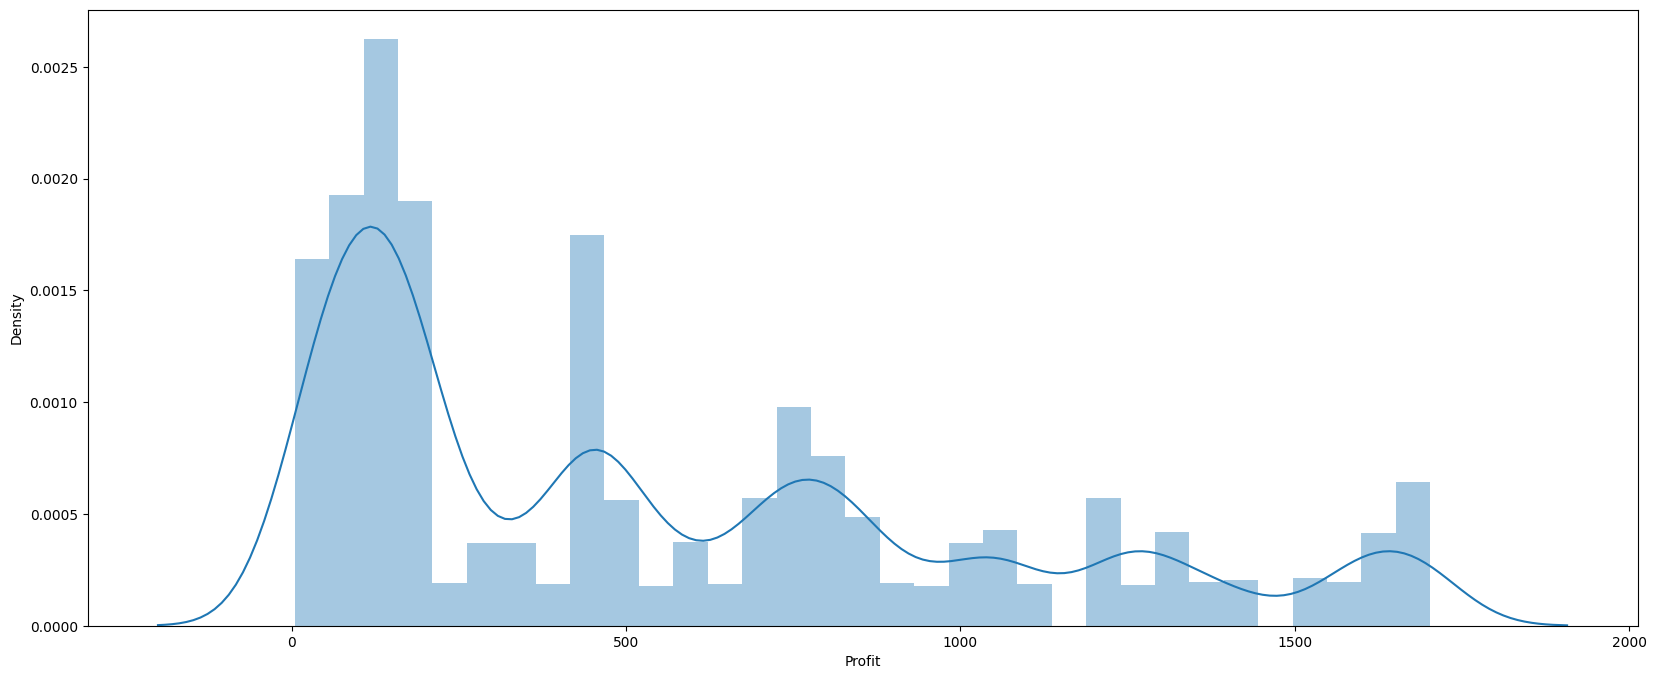

In [85]:
# Dystribution of the Profit Column

plt.figure(figsize=(20,8))
sns.distplot(trans['Profit'])

In [86]:
# Exporting the Cleaned Transaction Data Set to csv
trans.to_csv('Transactions_Cleaned.csv', index=False)